#### **Binary Classification**

#### **Note**
Candidate should split the training data in training and validation set with ratio of 4:1 to evaluate performance of the model on validation set.
Any classification model can be used, as deemed appropriate for the task. The candidate is free to explain the model selection process also if any.


In [20]:
# libraries used 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.inspection import permutation_importance

In [21]:
# reading train and test data
df = pd.read_csv("data/training_set.csv").drop(columns=["Unnamed: 0"],axis= 1)
df_test = pd.read_csv("data/test_set.csv").drop(columns=["Unnamed: 0"],axis = 1)
f"{df.shape}{df_test.shape}"

'(3910, 58)(691, 57)'

In [22]:
#value count Target columns
df.Y.value_counts()

0    2376
1    1534
Name: Y, dtype: int64

We have ratio of 60%-40% for Target output

In [23]:
df.sample(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
1649,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.074,0.298,0.000,0.000,0.074,4.268,28,286,0
1585,0.10,0.1,0.71,0.0,0.61,0.30,0.40,0.1,1.42,0.81,...,0.0,0.000,0.264,1.010,0.397,0.033,3.199,56,1043,1
3242,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.000,0.277,0.000,0.000,3.000,17,51,0
3795,0.00,0.0,1.66,0.0,0.00,0.00,0.00,0.0,0.00,0.00,...,0.0,0.000,0.000,0.151,0.000,0.000,1.518,8,41,0
2232,0.71,0.0,0.35,0.0,0.17,0.17,0.35,0.0,0.00,0.35,...,0.0,0.029,0.000,0.234,0.029,0.000,3.519,97,359,1


In [24]:
# descriptive stats for train data  
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,3910.0,0.102990,0.296322,0.0,0.00000,0.0000,0.00000,4.340
X2,3910.0,0.206419,1.253828,0.0,0.00000,0.0000,0.00000,14.280
X3,3910.0,0.284419,0.504352,0.0,0.00000,0.0000,0.43000,4.540
X4,3910.0,0.062074,1.369361,0.0,0.00000,0.0000,0.00000,42.810
X5,3910.0,0.311309,0.656195,0.0,0.00000,0.0000,0.38750,9.090
X6,3910.0,0.095974,0.261455,0.0,0.00000,0.0000,0.00000,3.570
X7,3910.0,0.112320,0.389516,0.0,0.00000,0.0000,0.00000,7.270
X8,3910.0,0.106041,0.398694,0.0,0.00000,0.0000,0.00000,11.110
X9,3910.0,0.091146,0.271417,0.0,0.00000,0.0000,0.00000,3.230
X10,3910.0,0.244345,0.667065,0.0,0.00000,0.0000,0.17000,18.180


#### Spliting Dataset into Train & Validation Data

In [25]:
X = df.drop(['Y'],axis=1)
y = df['Y']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
def model_summary(model, X_train,X_test,y_train, y_test):
    t_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print('Training Accuracy:\n', accuracy_score(y_train,t_pred))
    print('\n')
    print('Test Accuracy:\n', accuracy_score(y_test,test_pred))
    print('\n')
    # classification report
    print('Classification Report training:\n', classification_report(y_train,t_pred))
    print('\n')
    print('Classification Report test:\n', classification_report(y_test,test_pred))
    
    fig, axs = plt.subplots(1,2,figsize=[15,5])
    sns.heatmap(confusion_matrix(y_train,t_pred),annot=True,fmt="d",ax=axs[0])
    
    sns.heatmap(confusion_matrix(y_test,test_pred),annot=True,fmt="d",ax=axs[1])
    axs[0].set_title('Training')
    axs[1].set_title('Test')
    

    t_pred_proba = model.predict_proba(X_train)[:,1]
    test_pred_proba = model.predict_proba(X_test)[:,1]

    print(f'Train AUC Score for the model -> {roc_auc_score(y_train, t_pred_proba)}')
    print(f'Testing AUC Score for the model -> {roc_auc_score(y_test, test_pred_proba)}')

    plt.show()
    return

#### Building a model on all give set of feature's

Training Accuracy:
 0.9993606138107417


Test Accuracy:
 0.9526854219948849


Classification Report training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1903
           1       1.00      1.00      1.00      1225

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



Classification Report test:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       473
           1       0.96      0.92      0.94       309

    accuracy                           0.95       782
   macro avg       0.95      0.95      0.95       782
weighted avg       0.95      0.95      0.95       782

Train AUC Score for the model -> 0.9999991420635517
Testing AUC Score for the model -> 0.991112297050432


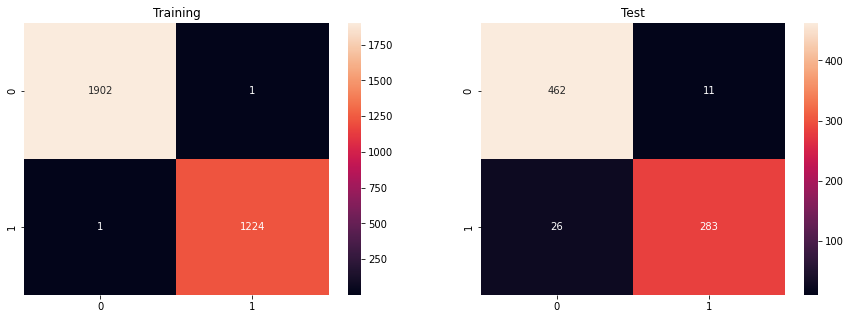

In [28]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# performance summary
model_summary(rf_classifier, X_train, X_test, y_train, y_test)

### performing feature selection for give train data with use of embedded algorithm.

In [29]:
feature_s = permutation_importance(rf_classifier, X,y)

<AxesSubplot:>

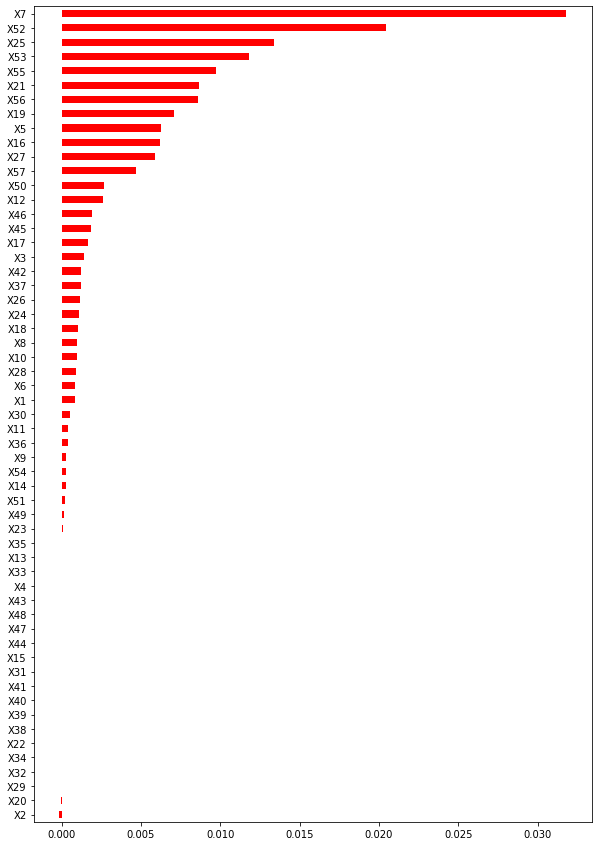

In [30]:
sorted_features = pd.Series(feature_s.importances_mean, index=X.columns).sort_values()
sorted_features.plot.barh( color = 'red', figsize=[10,15])

#### Taking feature which are having value greater than 0.001

In [31]:
feature_s1 = sorted_features[sorted_features > 0.001].index.to_list()
len(feature_s1)

23

#### Building model on selected features

Training Accuracy:
 0.9993606138107417


Test Accuracy:
 0.9475703324808185


Classification Report training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1903
           1       1.00      1.00      1.00      1225

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



Classification Report test:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       473
           1       0.96      0.91      0.93       309

    accuracy                           0.95       782
   macro avg       0.95      0.94      0.94       782
weighted avg       0.95      0.95      0.95       782

Train AUC Score for the model -> 0.9999991420635517
Testing AUC Score for the model -> 0.9874929014689683


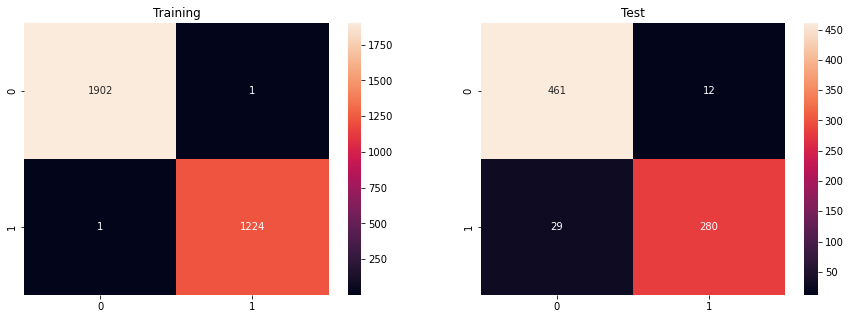

In [32]:
rf_classifier.fit(X_train[feature_s1],y_train)
model_summary(rf_classifier, X_train[feature_s1], X_test[feature_s1], y_train, y_test)

C:\Users\Yash\.conda\envs\basic\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:
 0.9987212276214834


Test Accuracy:
 0.9501278772378516


Classification Report training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1903
           1       1.00      1.00      1.00      1225

    accuracy                           1.00      3128
   macro avg       1.00      1.00      1.00      3128
weighted avg       1.00      1.00      1.00      3128



Classification Report test:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       473
           1       0.96      0.92      0.94       309

    accuracy                           0.95       782
   

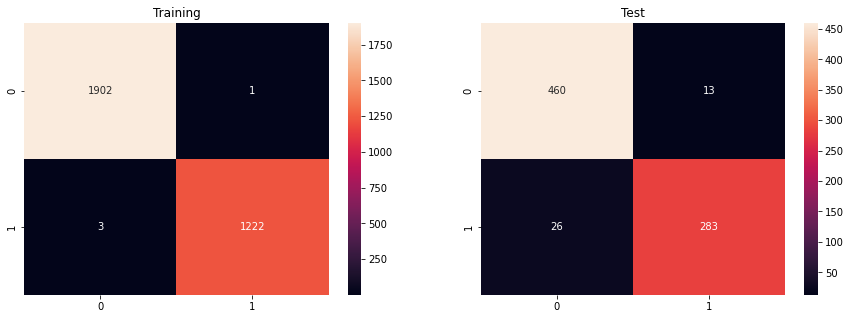

In [33]:
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train[feature_s1],y_train)
model_summary(xgb_classifier, X_train[feature_s1], X_test[feature_s1], y_train, y_test)

In [34]:
# from sklearn.model_selection import RandomizedSearchCV

# random_grid = { 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#                 'max_features': ['auto', 'sqrt'],
#                 'min_samples_leaf': [1, 2, 4, 6],
#                 'min_samples_split': [2, 5, 10],
#                 'n_estimators': [200, 400, 600, 800] }
# rf_random = RandomizedSearchCV(estimator = rf_classifier, param_distributions = random_grid, n_iter = 100 , random_state=42)
# rf_random.fit(X_train[feature_s1],y_train)
# rf_random1 = RandomForestClassifier(n_estimators= 800,min_samples_split= 5,min_samples_leaf= 1,max_features= 'auto',max_depth= 30)
# rf_random1.fit(X_train[feature_s1],y_train)
# model_summary(rf_random1, X_train[feature_s1], X_test[feature_s1], y_train, y_test)

#### Prediction on provided test dataset 

In [35]:
df_test.sample(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
77,0.0,0.0,0.66,0.0,0.0,0.00,0.0,0.00,0.00,0.33,...,0.0,0.0,0.282,0.0,0.000,0.000,0.0,2.238,13,188
305,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.94,0.00,...,0.0,0.0,0.203,0.0,0.000,0.000,0.0,1.416,6,34
413,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.202,0.0,0.000,0.000,0.0,1.000,1,14
243,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,2.818,8,31
613,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.208,0.000,0.0,1.758,11,51
417,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.259,0.000,0.0,1.681,12,37
334,0.0,0.0,0.96,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.086,0.0,0.260,0.086,0.0,1.117,4,38
76,0.0,0.0,0.00,0.0,0.0,0.32,0.0,0.65,0.00,0.00,...,0.0,0.0,0.081,0.0,0.000,0.000,0.0,4.093,87,262
328,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.0,1.333,2,4
553,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,1.754,0.0,0.000,0.000,0.0,1.000,1,7


In [36]:
df_test_pred = xgb_classifier.predict(df_test[feature_s1])

In [41]:
df_test = pd.read_csv("test_set.csv")
Final = pd.DataFrame({'NO.':df_test['Unnamed: 0'], 'Y':df_test_pred})

In [42]:
Final

,NO.,Y
0,0,0
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
686,686,0
687,687,0
688,688,0
689,689,0
